In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/job_descriptions.csv')
df.head()


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [4]:
import numpy as np

In [5]:
if df is not None:
    print("First 5 rows of the dataset (before any modifications):")
    print(df.head())
    print("\n-------------------------------------\n")
    
    print("Dataset Info (as provided by user):")
    print("(User has provided df.info() output separately. Columns confirmed.)")
    print("\n-------------------------------------\n")
    
    opening_date_col = 'Job Posting Date'
    
    # Convert 'Job Posting Date' to datetime
    if opening_date_col in df.columns:
        print(f"Attempting to convert '{opening_date_col}' to datetime...")
        df[opening_date_col] = pd.to_datetime(df[opening_date_col], errors='coerce')
        print(f"Successfully converted '{opening_date_col}' to datetime.")
        print(f"Number of rows where date parsing failed (now NaT): {df[opening_date_col].isnull().sum()}")
    else:
        print(f"ERROR: The expected opening date column '{opening_date_col}' was NOT FOUND in the DataFrame.")
        print("Cannot proceed without the job opening date.")

    print("\n-------------------------------------\n")
    print("SYNTHESIZING 'TimeToFill_days' and 'DateRequisitionClosed':")
    print("IMPORTANT: This data is being generated artificially for practice/workflow development.")
    print("It does NOT reflect actual hiring times and should not be used for real predictions.")

    if opening_date_col in df.columns and df[opening_date_col].notnull().all():
        # Generate synthetic TimeToFill_days (e.g., random number between 15 and 90 days)
        min_ttf = 15
        max_ttf = 90
        # Ensure we only generate for rows that have a valid opening_date_col
        num_valid_open_dates = len(df[df[opening_date_col].notnull()])

        df['TimeToFill_days'] = np.nan # Initialize column
        
        # Generate random TTF for valid open dates
        # Using a Series ensures proper alignment if there were NaTs in 'Job Posting Date'
        synthetic_ttfs = pd.Series(np.random.randint(min_ttf, max_ttf + 1, size=num_valid_open_dates),
                                   index=df[df[opening_date_col].notnull()].index)
        
        df.loc[df[opening_date_col].notnull(), 'TimeToFill_days'] = synthetic_ttfs
        
        print(f"Generated synthetic 'TimeToFill_days' between {min_ttf} and {max_ttf} days.")
        
        # Calculate synthetic 'DateRequisitionClosed'
        # Ensure 'TimeToFill_days' is treated as numeric (days) for timedelta
        df['Synthetic_DateRequisitionClosed'] = df[opening_date_col] + pd.to_timedelta(df['TimeToFill_days'], unit='D')
        print("Calculated synthetic 'Synthetic_DateRequisitionClosed'.")
        
    elif opening_date_col not in df.columns:
        print(f"Cannot synthesize dates because '{opening_date_col}' is missing.")
        df['TimeToFill_days'] = np.nan
        df['Synthetic_DateRequisitionClosed'] = pd.NaT
    else: # Some opening dates might be NaT
        print(f"Warning: Some '{opening_date_col}' values are NaT. Synthetic TTF will only be generated for valid dates.")
        df['TimeToFill_days'] = np.nan 
        df['Synthetic_DateRequisitionClosed'] = pd.NaT
        
        valid_open_dates_mask = df[opening_date_col].notnull()
        num_valid_open_dates = valid_open_dates_mask.sum()

        if num_valid_open_dates > 0:
            min_ttf = 15
            max_ttf = 90
            synthetic_ttfs = pd.Series(np.random.randint(min_ttf, max_ttf + 1, size=num_valid_open_dates),
                                   index=df[valid_open_dates_mask].index)
            df.loc[valid_open_dates_mask, 'TimeToFill_days'] = synthetic_ttfs
            df.loc[valid_open_dates_mask, 'Synthetic_DateRequisitionClosed'] = df.loc[valid_open_dates_mask, opening_date_col] + \
                                                              pd.to_timedelta(df.loc[valid_open_dates_mask, 'TimeToFill_days'], unit='D')
            print(f"Generated synthetic 'TimeToFill_days' (between {min_ttf}-{max_ttf} days) and 'Synthetic_DateRequisitionClosed' for rows with valid opening dates.")
        else:
            print("No valid opening dates found to generate synthetic TTF.")


    print("\n-------------------------------------\n")
    print("First 5 rows after SYNTHETIC 'TimeToFill_days' and 'Synthetic_DateRequisitionClosed' generation:")
    display_cols = ['Job Id', opening_date_col, 'TimeToFill_days', 'Synthetic_DateRequisitionClosed'] + \
                   [col for col in df.columns if col not in ['Job Id', opening_date_col, 'TimeToFill_days', 'Synthetic_DateRequisitionClosed']][:2]
    print(df[display_cols].head())
    
    print("\nSummary of SYNTHETIC 'TimeToFill_days':")
    if 'TimeToFill_days' in df.columns:
        print(df['TimeToFill_days'].describe())
    else:
        print("'TimeToFill_days' column was not created.")
else:
    print("DataFrame (df) was not loaded in the previous cell. Cannot proceed.")


First 5 rows of the dataset (before any modifications):
             Job Id     Experience Qualifications Salary Range    location  \
0  1089843540111562  5 to 15 Years         M.Tech    $59K-$99K     Douglas   
1   398454096642776  2 to 12 Years            BCA   $56K-$116K    Ashgabat   
2   481640072963533  0 to 12 Years            PhD   $61K-$104K       Macao   
3   688192671473044  4 to 11 Years            PhD    $65K-$91K  Porto-Novo   
4   117057806156508  1 to 12 Years            MBA    $64K-$87K    Santiago   

            Country  latitude  longitude  Work Type  Company Size  ...  \
0       Isle of Man   54.2361    -4.5481     Intern         26801  ...   
1      Turkmenistan   38.9697    59.5563     Intern        100340  ...   
2  Macao SAR, China   22.1987   113.5439  Temporary         84525  ...   
3             Benin    9.3077     2.3158  Full-Time        129896  ...   
4             Chile  -35.6751   -71.5429     Intern         53944  ...   

                 Contact      

In [6]:
if 'df' in locals() and df is not None:
    print("Percentage of missing values per column:")
    missing_percentage = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
    # Show only columns that actually have missing values
    print(missing_percentage[missing_percentage > 0])

    # Handle missing 'Company Profile' data
    # Based on df.info(), 'Company Profile' was the main column with NaNs.
    if 'Company Profile' in df.columns and df['Company Profile'].isnull().any():
        print(f"\nMissing values in 'Company Profile' before filling: {df['Company Profile'].isnull().sum()}")
        df['Company Profile'].fillna('Unknown', inplace=True)
        print(f"Missing values in 'Company Profile' after filling with 'Unknown': {df['Company Profile'].isnull().sum()}")
    elif 'Company Profile' in df.columns:
        print("\n'Company Profile' column has no missing values to fill.")
    else:
        print("\n'Company Profile' column not found.")
else:
    print("DataFrame 'df' not found. Please run previous cells to load and prepare data.")

Percentage of missing values per column:
Company Profile    0.338998
dtype: float64

Missing values in 'Company Profile' before filling: 5478
Missing values in 'Company Profile' after filling with 'Unknown': 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_11236\2946177068.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company Profile'].fillna('Unknown', inplace=True)


Descriptive statistics for numerical features:
           latitude     longitude  Company Size
count  1.615940e+06  1.615940e+06  1.615940e+06
mean   1.937743e+01  1.639926e+01  7.370467e+04
std    2.355690e+01  7.066762e+01  3.529886e+04
min   -4.090060e+01 -1.751982e+02  1.264600e+04
25%    5.152100e+00 -1.531010e+01  4.311400e+04
50%    1.807080e+01  1.914510e+01  7.363300e+04
75%    3.907420e+01  4.757690e+01  1.043000e+05
max    7.170690e+01  1.780650e+02  1.348340e+05

Plotting distributions for numerical features:


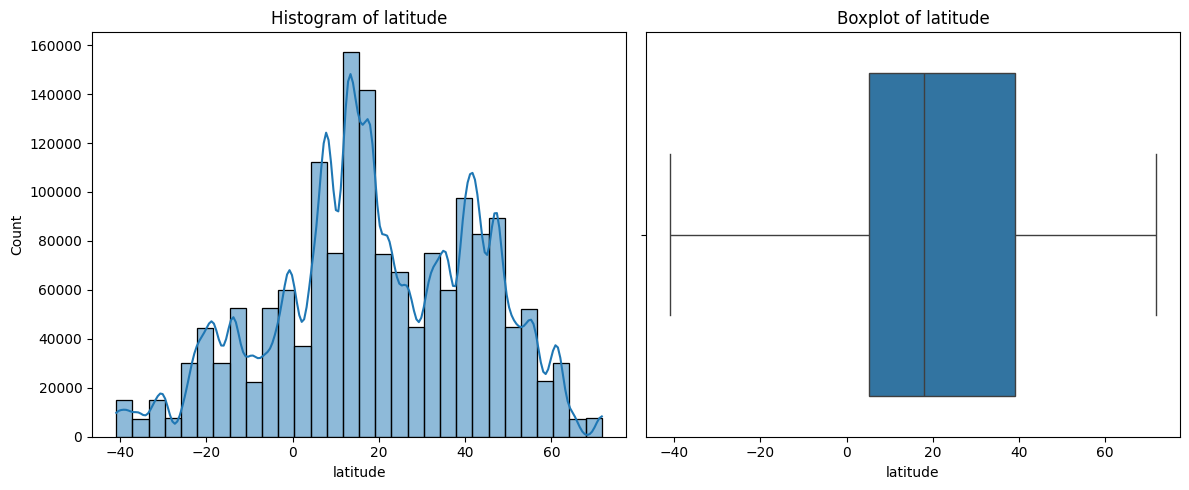

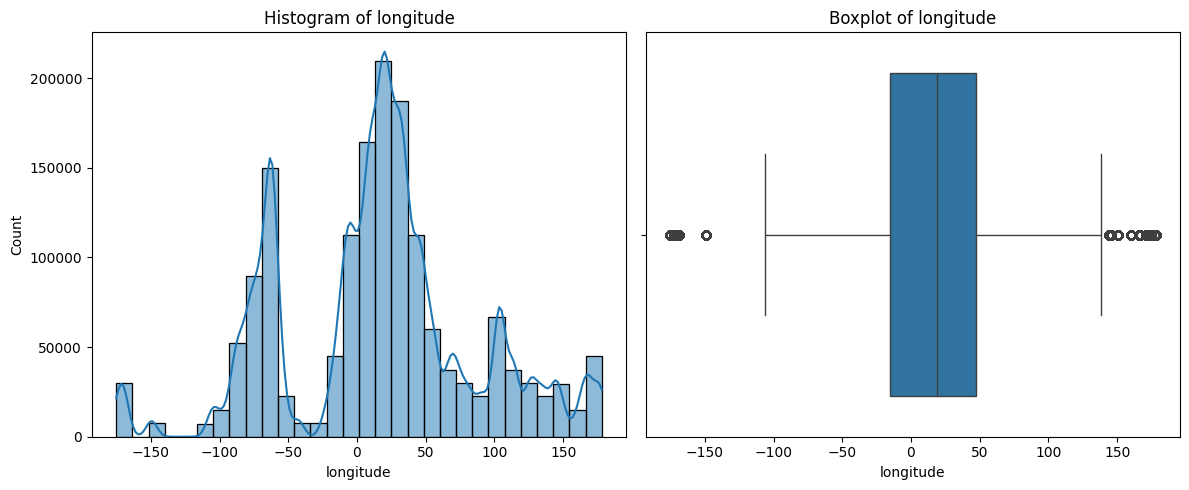

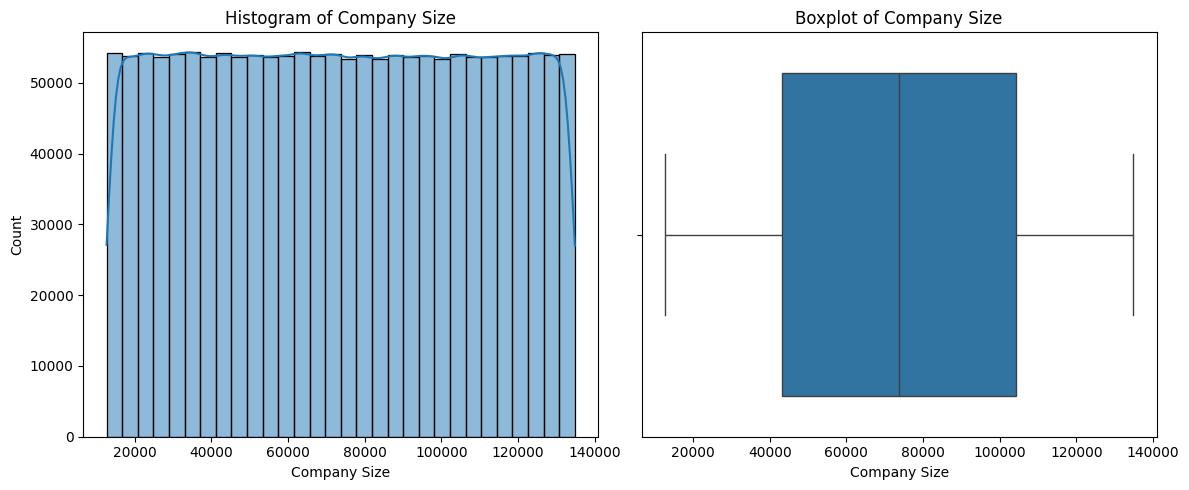

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' in locals() and df is not None:
    numerical_features_to_analyze = ['latitude', 'longitude', 'Company Size']
    
    # Filter for columns that actually exist in the DataFrame
    existing_numerical_features = [col for col in numerical_features_to_analyze if col in df.columns]
    
    if existing_numerical_features:
        print("Descriptive statistics for numerical features:")
        print(df[existing_numerical_features].describe())
        
        print("\nPlotting distributions for numerical features:")
        for col in existing_numerical_features:
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            # Add dropna() for robustness in case any numerical columns somehow have NaNs
            sns.histplot(df[col].dropna(), kde=True, bins=30)
            plt.title(f'Histogram of {col}')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col].dropna())
            plt.title(f'Boxplot of {col}')
            
            plt.tight_layout()
            plt.show()
    else:
        print(f"None of the specified numerical features ({', '.join(numerical_features_to_analyze)}) found in DataFrame.")
else:
    print("DataFrame 'df' not found. Please run previous cells.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  


--- Analyzing: location ---
Number of unique values: 214

Top 10 Value Counts:
location
Seoul                        15104
Apia                         15057
Valletta                      7723
Caracas                       7694
Mogadishu                     7689
Freetown                      7656
Hanoi                         7649
Sri Jayawardenepura Kotte     7649
Baku                          7643
San Marino                    7638
Name: count, dtype: int64

Visualizing TTF for Top 10 categories of location:


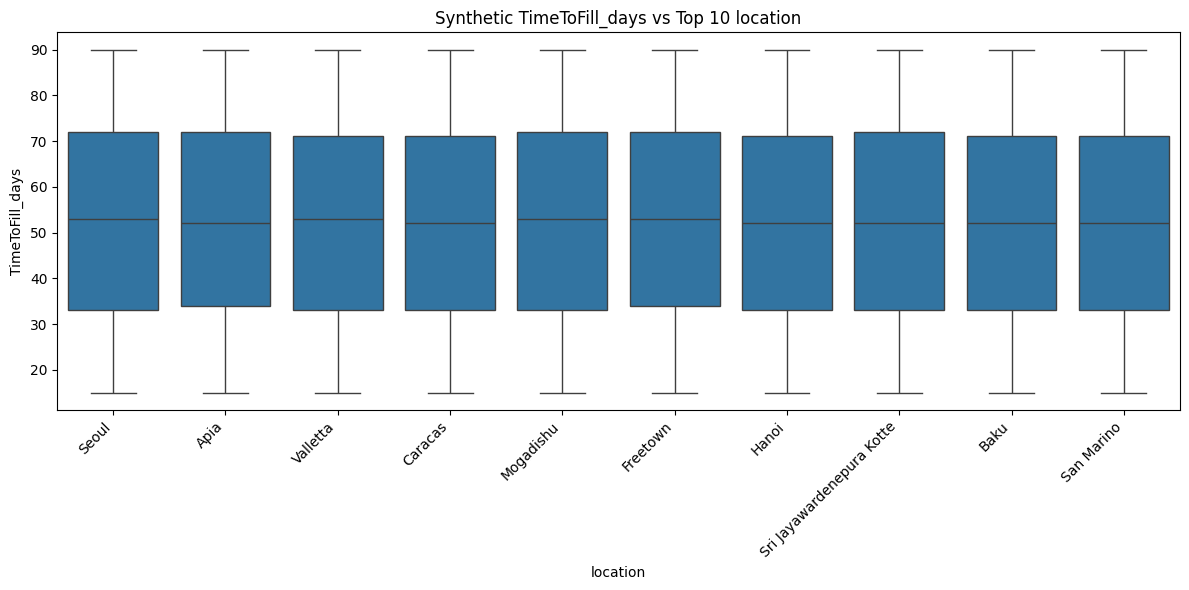


--- Analyzing: Country ---
Number of unique values: 216

Top 10 Value Counts:
Country
Malta            7723
Venezuela, RB    7694
Somalia          7689
Sierra Leone     7656
Sri Lanka        7649
Vietnam          7649
Azerbaijan       7643
San Marino       7638
Turkmenistan     7633
Rwanda           7630
Name: count, dtype: int64

Visualizing TTF for Top 10 categories of Country:


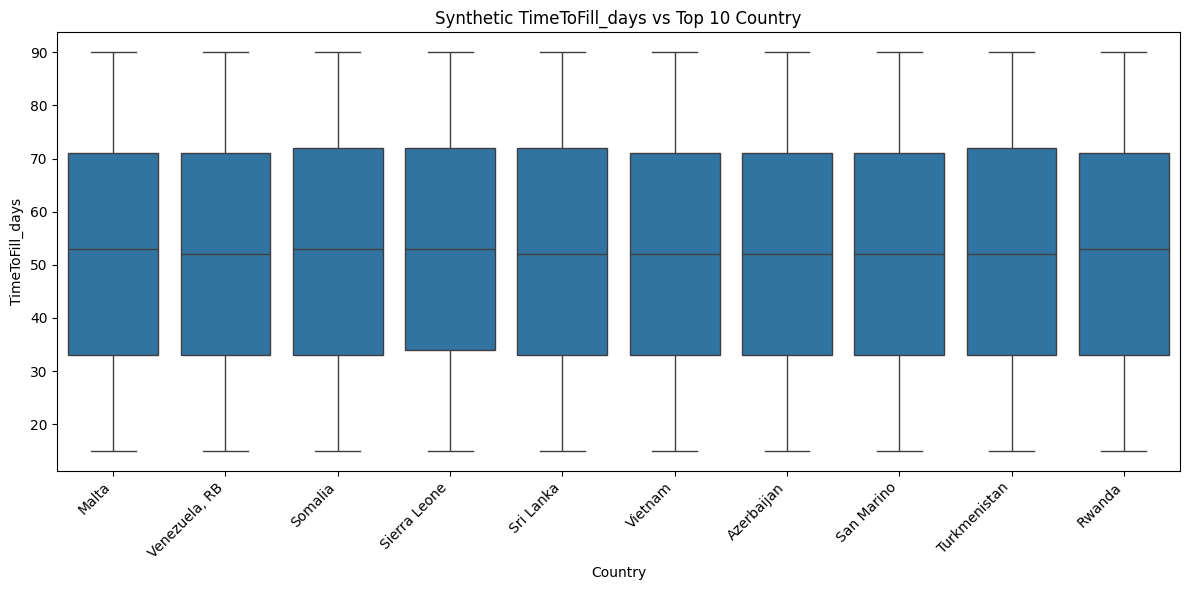


--- Analyzing: Work Type ---
Number of unique values: 5

Top 10 Value Counts:
Work Type
Part-Time    324044
Temporary    323439
Contract     323131
Intern       323090
Full-Time    322236
Name: count, dtype: int64

Visualizing TTF for all categories of Work Type:


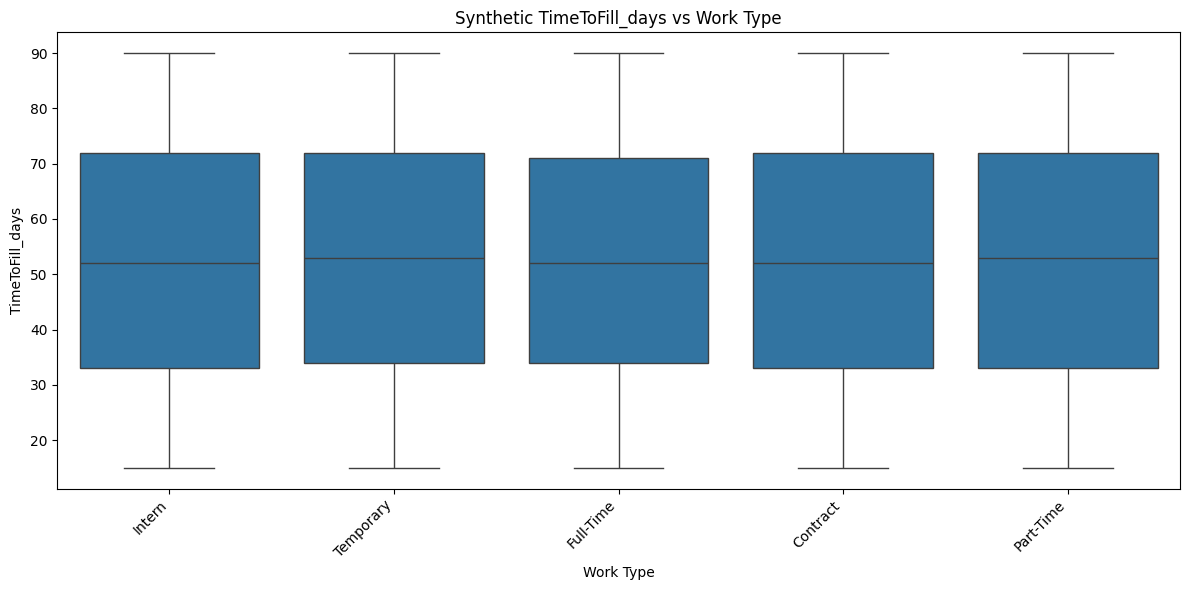


--- Analyzing: Preference ---
Number of unique values: 3

Top 10 Value Counts:
Preference
Male      539167
Both      538437
Female    538336
Name: count, dtype: int64

Visualizing TTF for all categories of Preference:


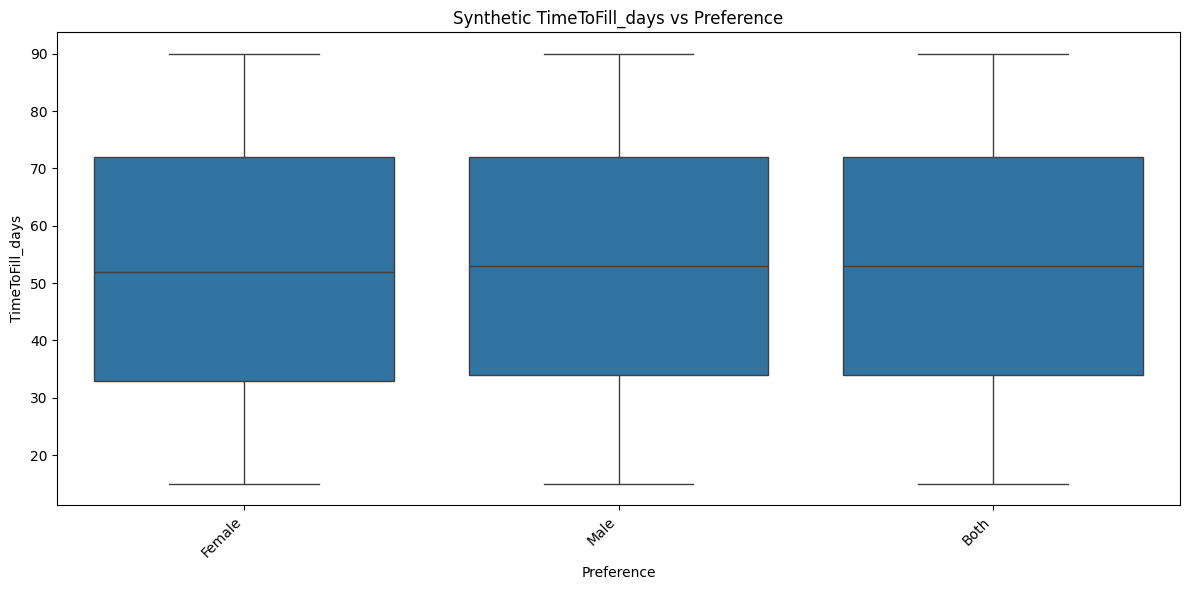


--- Analyzing: Role ---
Number of unique values: 376

Top 10 Value Counts:
Role
Interaction Designer         20580
Network Administrator        17470
User Interface Designer      14036
Social Media Manager         13945
User Experience Designer     13935
Procurement Analyst          13757
Social Media Analyst         10659
Quality Assurance Analyst    10541
SEO Specialist               10512
Executive Assistant          10496
Name: count, dtype: int64

Visualizing TTF for Top 10 categories of Role:


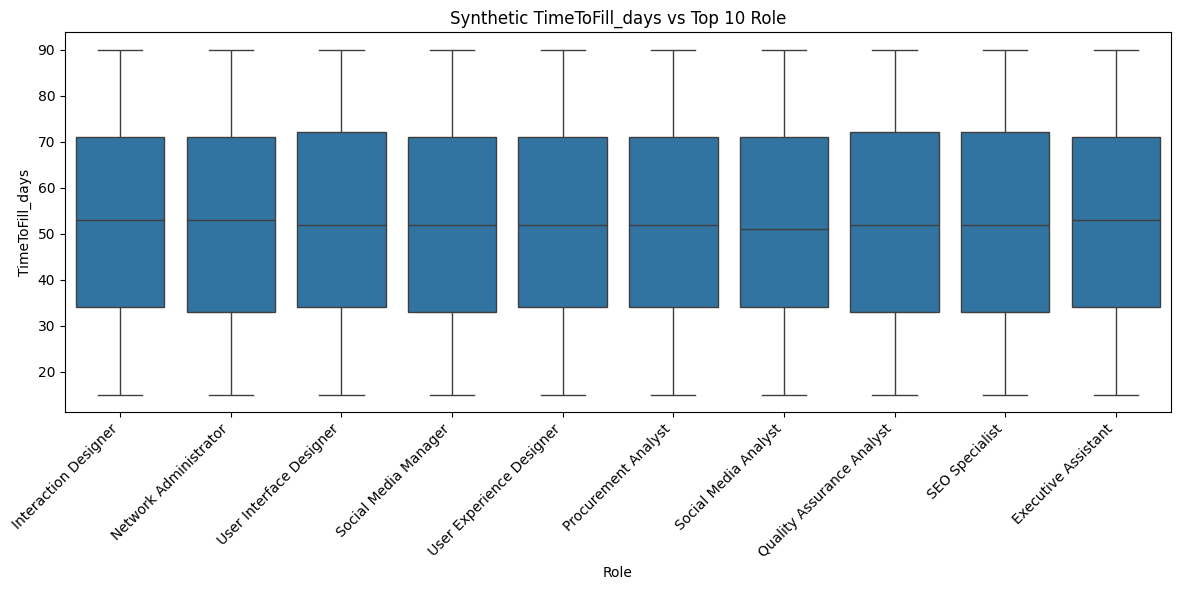


--- Analyzing: Job Portal ---
Number of unique values: 16

Top 10 Value Counts:
Job Portal
FlexJobs               129879
Stack Overflow Jobs    129379
Jobs2Careers           129245
Snagajob               129088
USAJOBS                129066
SimplyHired            129059
The Muse               129033
Idealist               128952
Internships.com        128790
Monster                 65058
Name: count, dtype: int64

Visualizing TTF for Top 10 categories of Job Portal:


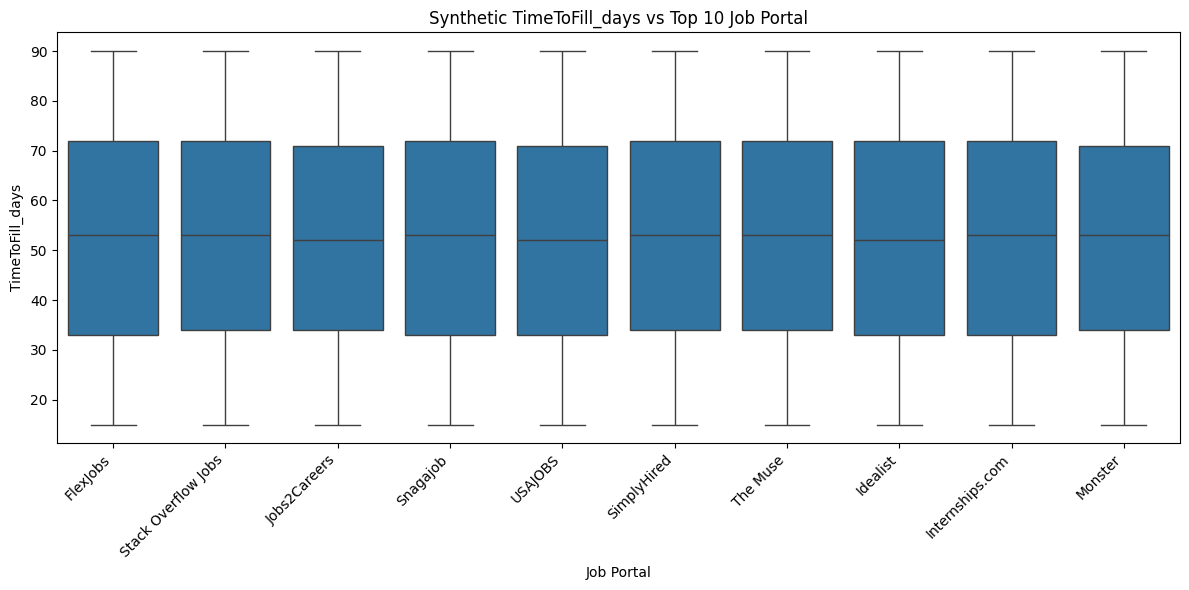


--- Analyzing: Company ---
Number of unique values: 888

Top 10 Value Counts:
Company
DTE Energy                            1957
Berry Global Group                    1941
Marsh & McLennan                      1941
Vistra                                1938
International Flavors & Fragrances    1928
Bank of New York Mellon               1927
Midea Group                           1922
BJ's Wholesale Club                   1918
Bharat Electronics Limited            1918
Derwent London                        1911
Name: count, dtype: int64

Visualizing TTF for Top 10 categories of Company:


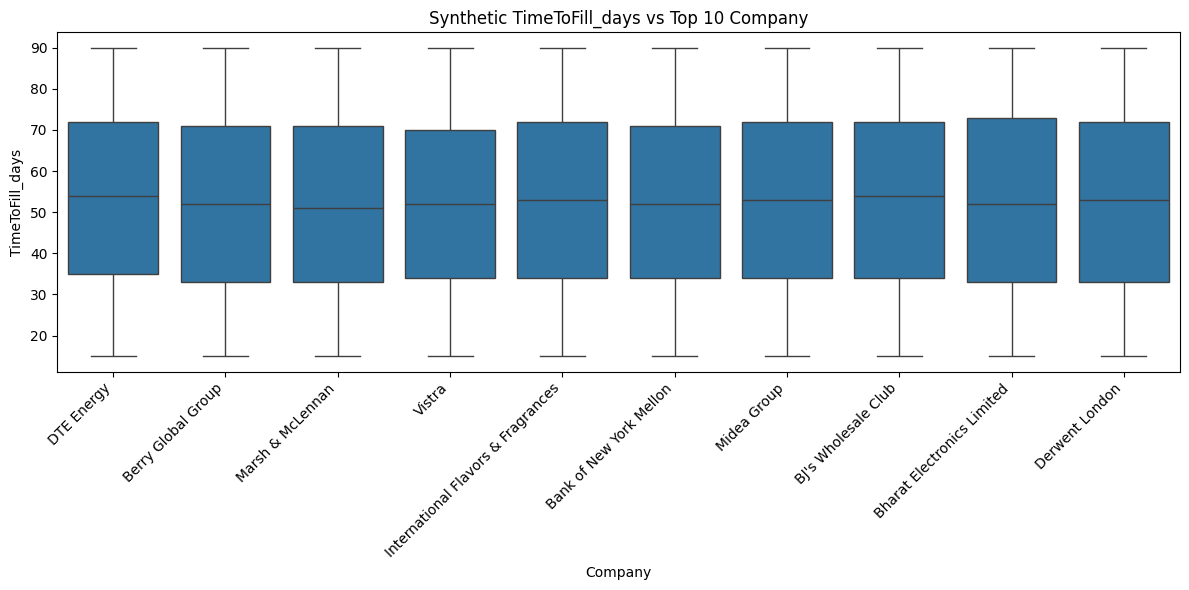

In [8]:
if 'df' in locals() and df is not None:
    categorical_cols_to_analyze = ['location', 'Country', 'Work Type', 'Preference', 'Role', 'Job Portal', 'Company']
    
    # Filter for columns that actually exist in the DataFrame
    existing_categorical_cols = [col for col in categorical_cols_to_analyze if col in df.columns]

    for col in existing_categorical_cols:
        print(f"\n--- Analyzing: {col} ---")
        print(f"Number of unique values: {df[col].nunique()}")
        
        print("\nTop 10 Value Counts:")
        print(df[col].value_counts().nlargest(10))
        
        # For high cardinality features, plotting against TTF for all categories is too much.
        # We'll plot for the top N categories.
        top_n = 10 
        if df[col].nunique() > top_n:
            print(f"\nVisualizing TTF for Top {top_n} categories of {col}:")
            top_categories = df[col].value_counts().nlargest(top_n).index
            df_top_cat = df[df[col].isin(top_categories)]
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df_top_cat, x=col, y='TimeToFill_days', order=top_categories)
            plt.title(f'Synthetic TimeToFill_days vs Top {top_n} {col}')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        elif df[col].nunique() > 0: # For low cardinality, plot all
            print(f"\nVisualizing TTF for all categories of {col}:")
            plt.figure(figsize=(12, 6))
            # Sort by median TimeToFill_days for better visualization if desired
            # order_by_median = df.groupby(col)['TimeToFill_days'].median().sort_values().index
            # sns.boxplot(data=df, x=col, y='TimeToFill_days', order=order_by_median)
            sns.boxplot(data=df, x=col, y='TimeToFill_days')
            plt.title(f'Synthetic TimeToFill_days vs {col}')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data or no unique values to plot for {col}")

else:
    print("DataFrame 'df' not found. Please run previous cells.")

In [9]:
import re # Import the regular expression module

if 'df' in locals() and df is not None and 'Experience' in df.columns:
    print("--- Parsing 'Experience' column ---")
    print("Original 'Experience' examples:")
    print(df['Experience'].head())

    # Initialize new columns with NaN
    df['MinExperience'] = np.nan
    df['MaxExperience'] = np.nan

    # Regex to capture numbers: extracts all numbers from the string
    # Assumes format like "X to Y Years", "X Years", "X+ Years"
    # This is a simplified approach; more complex patterns might need more robust regex

    for index, row in df.iterrows():
        exp_str = str(row['Experience']).lower() # Convert to string and lowercase
        numbers = re.findall(r'\d+', exp_str) # Find all sequences of digits
        
        if numbers:
            numbers = [int(n) for n in numbers]
            if len(numbers) == 1:
                df.loc[index, 'MinExperience'] = numbers[0]
                if '+' in exp_str: # e.g., "10+ years"
                    df.loc[index, 'MaxExperience'] = numbers[0] # Or set a high value like 30, or keep as NaN to impute later
                else: # e.g. "5 years" (implicitly min=max=5)
                    df.loc[index, 'MaxExperience'] = numbers[0]
            elif len(numbers) >= 2:
                # If "X to Y years", typically first is min, second is max.
                # If multiple numbers are found without "to", take min and max of them.
                df.loc[index, 'MinExperience'] = min(numbers)
                df.loc[index, 'MaxExperience'] = max(numbers)
        # If no numbers found, MinExperience and MaxExperience remain NaN

    print("\n'Experience' column parsed into 'MinExperience' and 'MaxExperience'.")
    print("Sample of new experience columns:")
    print(df[['Experience', 'MinExperience', 'MaxExperience']].head())
    
    print("\nDescriptive statistics for MinExperience and MaxExperience:")
    print(df[['MinExperience', 'MaxExperience']].describe())
    
    # Check for cases where MinExperience might be greater than MaxExperience (if parsing logic is complex)
    if not df[df['MinExperience'] > df['MaxExperience']].empty:
        print("\nWarning: Some rows have MinExperience > MaxExperience. Review parsing logic if this is unexpected.")
        print(df[df['MinExperience'] > df['MaxExperience']][['Experience', 'MinExperience', 'MaxExperience']].head())
        
    # Fill remaining NaNs if any (e.g., if some rows had no numbers) - simple median imputation for now
    df['MinExperience'].fillna(df['MinExperience'].median(), inplace=True)
    df['MaxExperience'].fillna(df['MaxExperience'].median(), inplace=True)
    print("\nNaNs in Min/MaxExperience filled with median (if any).")
    print(df[['MinExperience', 'MaxExperience']].isnull().sum())

else:
    print("DataFrame 'df' not found or 'Experience' column missing.")


--- Parsing 'Experience' column ---
Original 'Experience' examples:
0    5 to 15 Years
1    2 to 12 Years
2    0 to 12 Years
3    4 to 11 Years
4    1 to 12 Years
Name: Experience, dtype: object

'Experience' column parsed into 'MinExperience' and 'MaxExperience'.
Sample of new experience columns:
      Experience  MinExperience  MaxExperience
0  5 to 15 Years            5.0           15.0
1  2 to 12 Years            2.0           12.0
2  0 to 12 Years            0.0           12.0
3  4 to 11 Years            4.0           11.0
4  1 to 12 Years            1.0           12.0

Descriptive statistics for MinExperience and MaxExperience:
       MinExperience  MaxExperience
count   1.615940e+06   1.615940e+06
mean    2.501808e+00   1.149798e+01
std     1.707809e+00   2.291933e+00
min     0.000000e+00   8.000000e+00
25%     1.000000e+00   9.000000e+00
50%     3.000000e+00   1.100000e+01
75%     4.000000e+00   1.300000e+01
max     5.000000e+00   1.500000e+01

NaNs in Min/MaxExperience filled 

C:\Users\DELL\AppData\Local\Temp\ipykernel_11236\322296871.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinExperience'].fillna(df['MinExperience'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11236\322296871.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [10]:
if 'df' in locals() and df is not None and 'Salary Range' in df.columns:
    print("--- Parsing 'Salary Range' column ---")
    print("Original 'Salary Range' examples:")
    print(df['Salary Range'].head())

    # Initialize new columns
    df['MinSalary'] = np.nan
    df['MaxSalary'] = np.nan

    for index, row in df.iterrows():
        salary_str = str(row['Salary Range']).replace('$', '').replace(',', '') # Remove $ and commas
        
        # Find numbers, potentially with 'K' for thousands
        # This regex looks for numbers, optionally followed by 'K' (case-insensitive)
        # and handles ranges separated by '-' or 'to'.
        
        numbers_k = re.findall(r'(\d+)(k)?', salary_str.lower()) # Find numbers, capture 'k' if present
        
        parsed_salaries = []
        for num_str, k_present in numbers_k:
            num = int(num_str)
            if k_present:
                num *= 1000
            parsed_salaries.append(num)
            
        if len(parsed_salaries) == 1:
            df.loc[index, 'MinSalary'] = parsed_salaries[0]
            df.loc[index, 'MaxSalary'] = parsed_salaries[0] # Assume min=max if only one value
        elif len(parsed_salaries) >= 2:
            # Typically first is min, second is max.
            # If more than two, we take the smallest and largest.
            df.loc[index, 'MinSalary'] = min(parsed_salaries)
            df.loc[index, 'MaxSalary'] = max(parsed_salaries)

    print("\n'Salary Range' column parsed into 'MinSalary' and 'MaxSalary'.")
    print("Sample of new salary columns:")
    print(df[['Salary Range', 'MinSalary', 'MaxSalary']].head())

    print("\nDescriptive statistics for MinSalary and MaxSalary:")
    print(df[['MinSalary', 'MaxSalary']].describe())

    # Check for issues
    if not df[df['MinSalary'] > df['MaxSalary']].empty:
        print("\nWarning: Some rows have MinSalary > MaxSalary. Review parsing logic.")
        print(df[df['MinSalary'] > df['MaxSalary']][['Salary Range', 'MinSalary', 'MaxSalary']].head())
        
    # Optional: Create an AverageSalary feature
    df['AverageSalary'] = (df['MinSalary'] + df['MaxSalary']) / 2
    print("\n'AverageSalary' column created.")
    
    # Fill remaining NaNs - using median for simplicity
    df['MinSalary'].fillna(df['MinSalary'].median(), inplace=True)
    df['MaxSalary'].fillna(df['MaxSalary'].median(), inplace=True)
    df['AverageSalary'].fillna(df['AverageSalary'].median(), inplace=True)
    print("\nNaNs in salary columns filled with median (if any).")
    print(df[['MinSalary', 'MaxSalary', 'AverageSalary']].isnull().sum())

else:
    print("DataFrame 'df' not found or 'Salary Range' column missing.")

--- Parsing 'Salary Range' column ---
Original 'Salary Range' examples:
0     $59K-$99K
1    $56K-$116K
2    $61K-$104K
3     $65K-$91K
4     $64K-$87K
Name: Salary Range, dtype: object

'Salary Range' column parsed into 'MinSalary' and 'MaxSalary'.
Sample of new salary columns:
  Salary Range  MinSalary  MaxSalary
0    $59K-$99K    59000.0    99000.0
1   $56K-$116K    56000.0   116000.0
2   $61K-$104K    61000.0   104000.0
3    $65K-$91K    65000.0    91000.0
4    $64K-$87K    64000.0    87000.0

Descriptive statistics for MinSalary and MaxSalary:
          MinSalary     MaxSalary
count  1.615940e+06  1.615940e+06
mean   6.000343e+04  1.049789e+05
std    3.163964e+03  1.471749e+04
min    5.500000e+04  8.000000e+04
25%    5.700000e+04  9.200000e+04
50%    6.000000e+04  1.050000e+05
75%    6.300000e+04  1.180000e+05
max    6.500000e+04  1.300000e+05

'AverageSalary' column created.

NaNs in salary columns filled with median (if any).
MinSalary        0
MaxSalary        0
AverageSalary  

C:\Users\DELL\AppData\Local\Temp\ipykernel_11236\2795376122.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinSalary'].fillna(df['MinSalary'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11236\2795376122.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [11]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,TimeToFill_days,Synthetic_DateRequisitionClosed,MinExperience,MaxExperience,MinSalary,MaxSalary,AverageSalary
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,"Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",39.0,2022-06-02,5.0,15.0,59000.0,99000.0,79000.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,"Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",41.0,2023-01-29,2.0,12.0,56000.0,116000.0,86000.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",44.0,2022-10-28,0.0,12.0,61000.0,104000.0,82500.0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",49.0,2023-04-15,4.0,11.0,65000.0,91000.0,78000.0
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",48.0,2022-11-28,1.0,12.0,64000.0,87000.0,75500.0


--- Analyzing 'Qualifications' column ---
Number of unique values in Qualifications: 10

Top 10 Value Counts:
Qualifications
BBA       162148
BA        162138
BCA       161733
M.Tech    161719
PhD       161662
MBA       161537
B.Tech    161443
M.Com     161396
B.Com     161298
MCA       160866
Name: count, dtype: int64

Visualizing TTF for Top 10 categories of Qualifications (if more than 10 unique values):


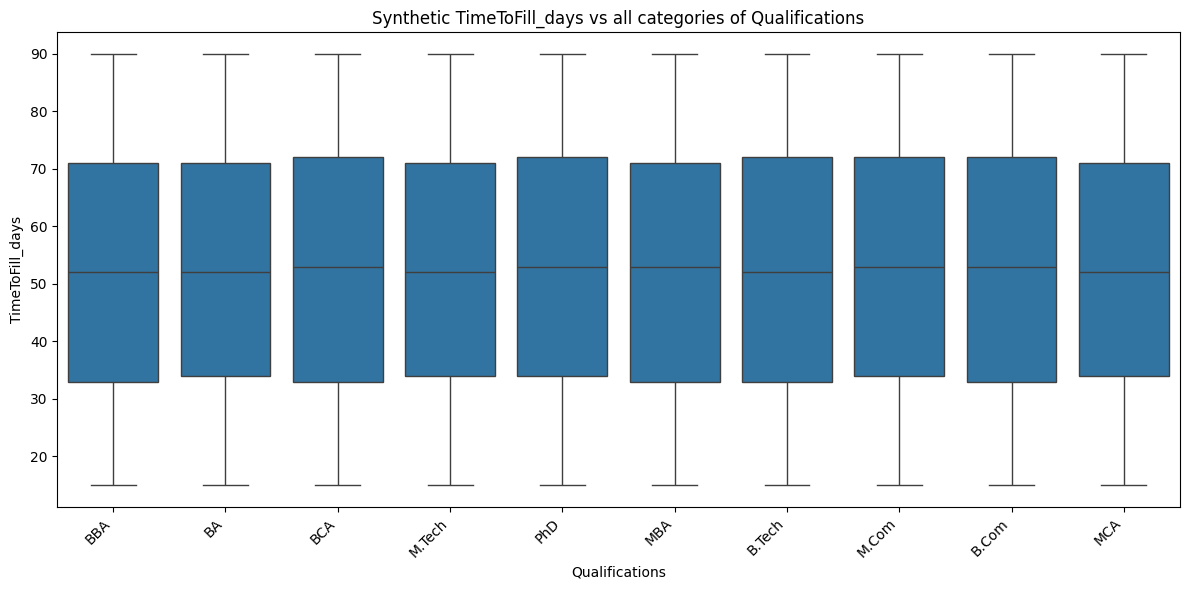

In [12]:
if 'df' in locals() and df is not None and 'Qualifications' in df.columns:
    print("--- Analyzing 'Qualifications' column ---")
    col = 'Qualifications'
    
    print(f"Number of unique values in {col}: {df[col].nunique()}")
    
    print("\nTop 10 Value Counts:")
    print(df[col].value_counts().nlargest(10))
    
    # Visualize TTF for the top N categories
    top_n = 10 # df[col].nunique() if df[col].nunique() < 10 else 10
    if df[col].nunique() > 0:
        print(f"\nVisualizing TTF for Top {top_n} categories of {col} (if more than {top_n} unique values):")
        
        # Determine categories to plot
        if df[col].nunique() <= top_n:
            categories_to_plot = df[col].value_counts().index
            title_suffix = f"all categories of {col}"
        else:
            categories_to_plot = df[col].value_counts().nlargest(top_n).index
            title_suffix = f"Top {top_n} categories of {col}"

        df_plot_cat = df[df[col].isin(categories_to_plot)]
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df_plot_cat, x=col, y='TimeToFill_days', order=categories_to_plot) # Use the selected categories for order
        plt.title(f'Synthetic TimeToFill_days vs {title_suffix}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data or no unique values to plot for {col}")
        
    # Consider grouping less frequent qualifications later if cardinality is very high.
    # For now, we're just observing.

else:
    print("DataFrame 'df' not found or 'Qualifications' column missing.")

--- Feature Engineering for 'skills' column ---
Original 'skills' examples:
0    Social media platforms (e.g., Facebook, Twitte...
1    HTML, CSS, JavaScript Frontend frameworks (e.g...
2    Quality control processes and methodologies St...
3    Wireless network design and architecture Wi-Fi...
4    Event planning Conference logistics Budget man...
Name: skills, dtype: object

'NumberOfSkills' column created.
Sample of new 'NumberOfSkills' column:
                                              skills  NumberOfSkills
0  Social media platforms (e.g., Facebook, Twitte...               4
1  HTML, CSS, JavaScript Frontend frameworks (e.g...               5
2  Quality control processes and methodologies St...               2
3  Wireless network design and architecture Wi-Fi...               1
4  Event planning Conference logistics Budget man...               1

Descriptive statistics for 'NumberOfSkills':
count    1.615940e+06
mean     1.665803e+00
std      1.317682e+00
min      1.000000e+00


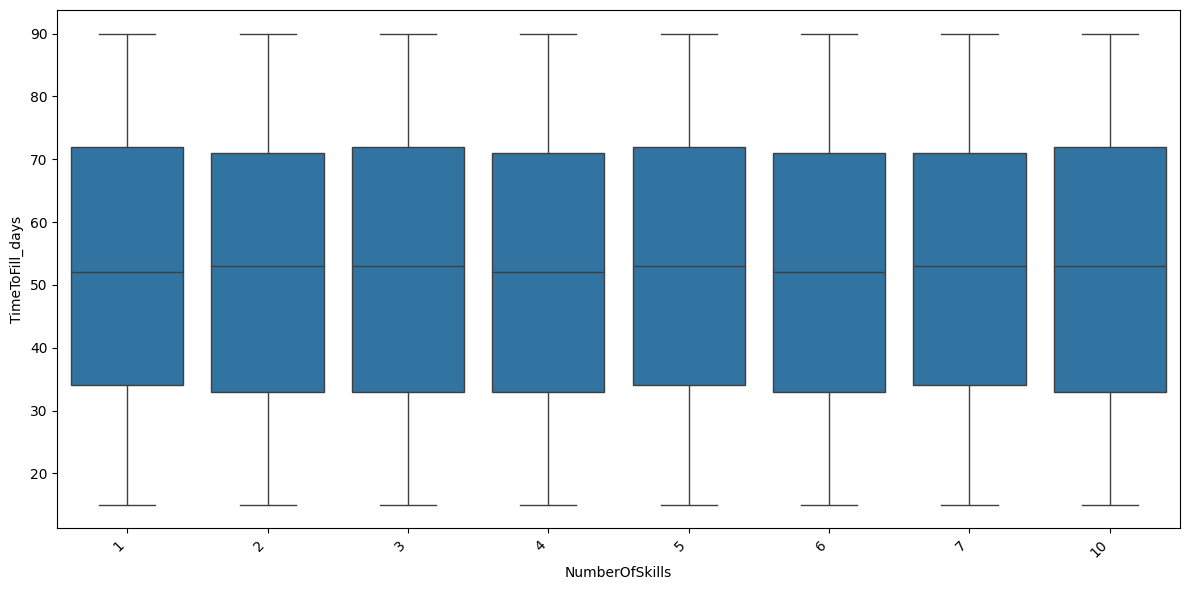

In [13]:
if 'df' in locals() and df is not None and 'skills' in df.columns:
    print("--- Feature Engineering for 'skills' column ---")
    print("Original 'skills' examples:")
    # Print a few non-null examples if possible
    print(df['skills'].dropna().head())

    # Assume skills are separated by commas or some other delimiter.
    # This is a common pattern. If your skills are structured differently (e.g., list in a string),
    # this logic might need adjustment.
    # We'll count non-empty strings after splitting.
    
    # A robust way to count, assuming skills are separated by common delimiters like comma, semicolon, or pipe.
    # This also handles potential leading/trailing spaces around skills.
    def count_skills(skill_string):
        if pd.isna(skill_string) or not isinstance(skill_string, str) or skill_string.strip() == '':
            return 0
        # Split by common delimiters: comma, semicolon, pipe. Add more if needed.
        # Strip whitespace from each potential skill and filter out empty strings.
        skills_list = [s.strip() for s in re.split(r'[,;|]', skill_string) if s.strip()]
        return len(skills_list)

    df['NumberOfSkills'] = df['skills'].apply(count_skills)
    
    print("\n'NumberOfSkills' column created.")
    print("Sample of new 'NumberOfSkills' column:")
    print(df[['skills', 'NumberOfSkills']].head())
    
    print("\nDescriptive statistics for 'NumberOfSkills':")
    print(df['NumberOfSkills'].describe())
    
    # Visualize relationship with TTF
    plt.figure(figsize=(12, 6))
    # Since NumberOfSkills can be discrete, a boxplot might be good.
    # If there are too many unique counts, consider grouping or using a scatter/line plot with aggregation.
    # For now, let's try a boxplot for up to a certain number of skills, or a scatter if too many.
    if df['NumberOfSkills'].nunique() < 20: # Arbitrary threshold for boxplot
         sns.boxplot(data=df, x='NumberOfSkills', y='TimeToFill_days')
    else: # If too many unique skill counts, a scatter plot (perhaps with some jitter) or violin plot might be better
        # sns.stripplot(data=df, x='NumberOfSkills', y='TimeToFill_days', jitter=0.3, alpha=0.5, size=3) # Example
        # For very high cardinality, let's group by NumberOfSkills and plot the mean TTF.
        grouped_skills_ttf = df.groupby('NumberOfSkills')['TimeToFill_days'].mean().reset_index()
        plt.figure(figsize=(14,7))
        sns.lineplot(data=grouped_skills_ttf, x='NumberOfSkills', y='TimeToFill_days', marker='o')
        plt.title('Average Synthetic TimeToFill_days vs. NumberOfSkills')
        
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame 'df' not found or 'skills' column missing.")


In [14]:
if 'df' in locals() and df is not None:
    text_cols_for_length_features = [
        'Job Title', 
        'Job Description', 
        'Benefits', 
        'Responsibilities', 
        'Company Profile' # We filled NaNs with 'Unknown' previously
    ]
    
    # Filter for columns that actually exist in the DataFrame
    existing_text_cols = [col for col in text_cols_for_length_features if col in df.columns]

    print("--- Creating text length and word count features ---")
    for col in existing_text_cols:
        # Ensure the column is string type, fill NaNs with empty string for length/word count
        df[col] = df[col].astype(str).fillna('') 
        
        df[f'{col}_Length'] = df[col].apply(len)
        df[f'{col}_Word_Count'] = df[col].apply(lambda x: len(x.split()))
        
        print(f"Created Length and Word Count features for: {col}")
        print(df[[f'{col}_Length', f'{col}_Word_Count']].describe())
        print("-" * 30)
        
    print("\nSample of new length/word count features (for Job Description):")
    if 'Job Description_Length' in df.columns:
        print(df[['Job Description', 'Job Description_Length', 'Job Description_Word_Count']].head())
else:
    print("DataFrame 'df' not found. Please run previous cells.")

--- Creating text length and word count features ---
Created Length and Word Count features for: Job Title
       Job Title_Length  Job Title_Word_Count
count      1.615940e+06          1.615940e+06
mean       1.734884e+01          2.096956e+00
std        4.668061e+00          4.421289e-01
min        7.000000e+00          1.000000e+00
25%        1.400000e+01          2.000000e+00
50%        1.700000e+01          2.000000e+00
75%        1.900000e+01          2.000000e+00
max        3.500000e+01          3.000000e+00
------------------------------
Created Length and Word Count features for: Job Description
       Job Description_Length  Job Description_Word_Count
count            1.615940e+06                1.615940e+06
mean             1.853684e+02                2.417144e+01
std              5.174361e+01                7.439241e+00
min              8.100000e+01                1.000000e+01
25%              1.560000e+02                1.900000e+01
50%              1.780000e+02           

--- Correlation Analysis ---
Numerical columns selected for correlation: ['Company Size', 'TimeToFill_days', 'MinExperience', 'MaxExperience', 'MinSalary', 'MaxSalary', 'AverageSalary', 'NumberOfSkills', 'Job Title_Length', 'Job Title_Word_Count', 'Job Description_Length', 'Job Description_Word_Count', 'Benefits_Length', 'Benefits_Word_Count', 'Responsibilities_Length', 'Responsibilities_Word_Count', 'Company Profile_Length', 'Company Profile_Word_Count']


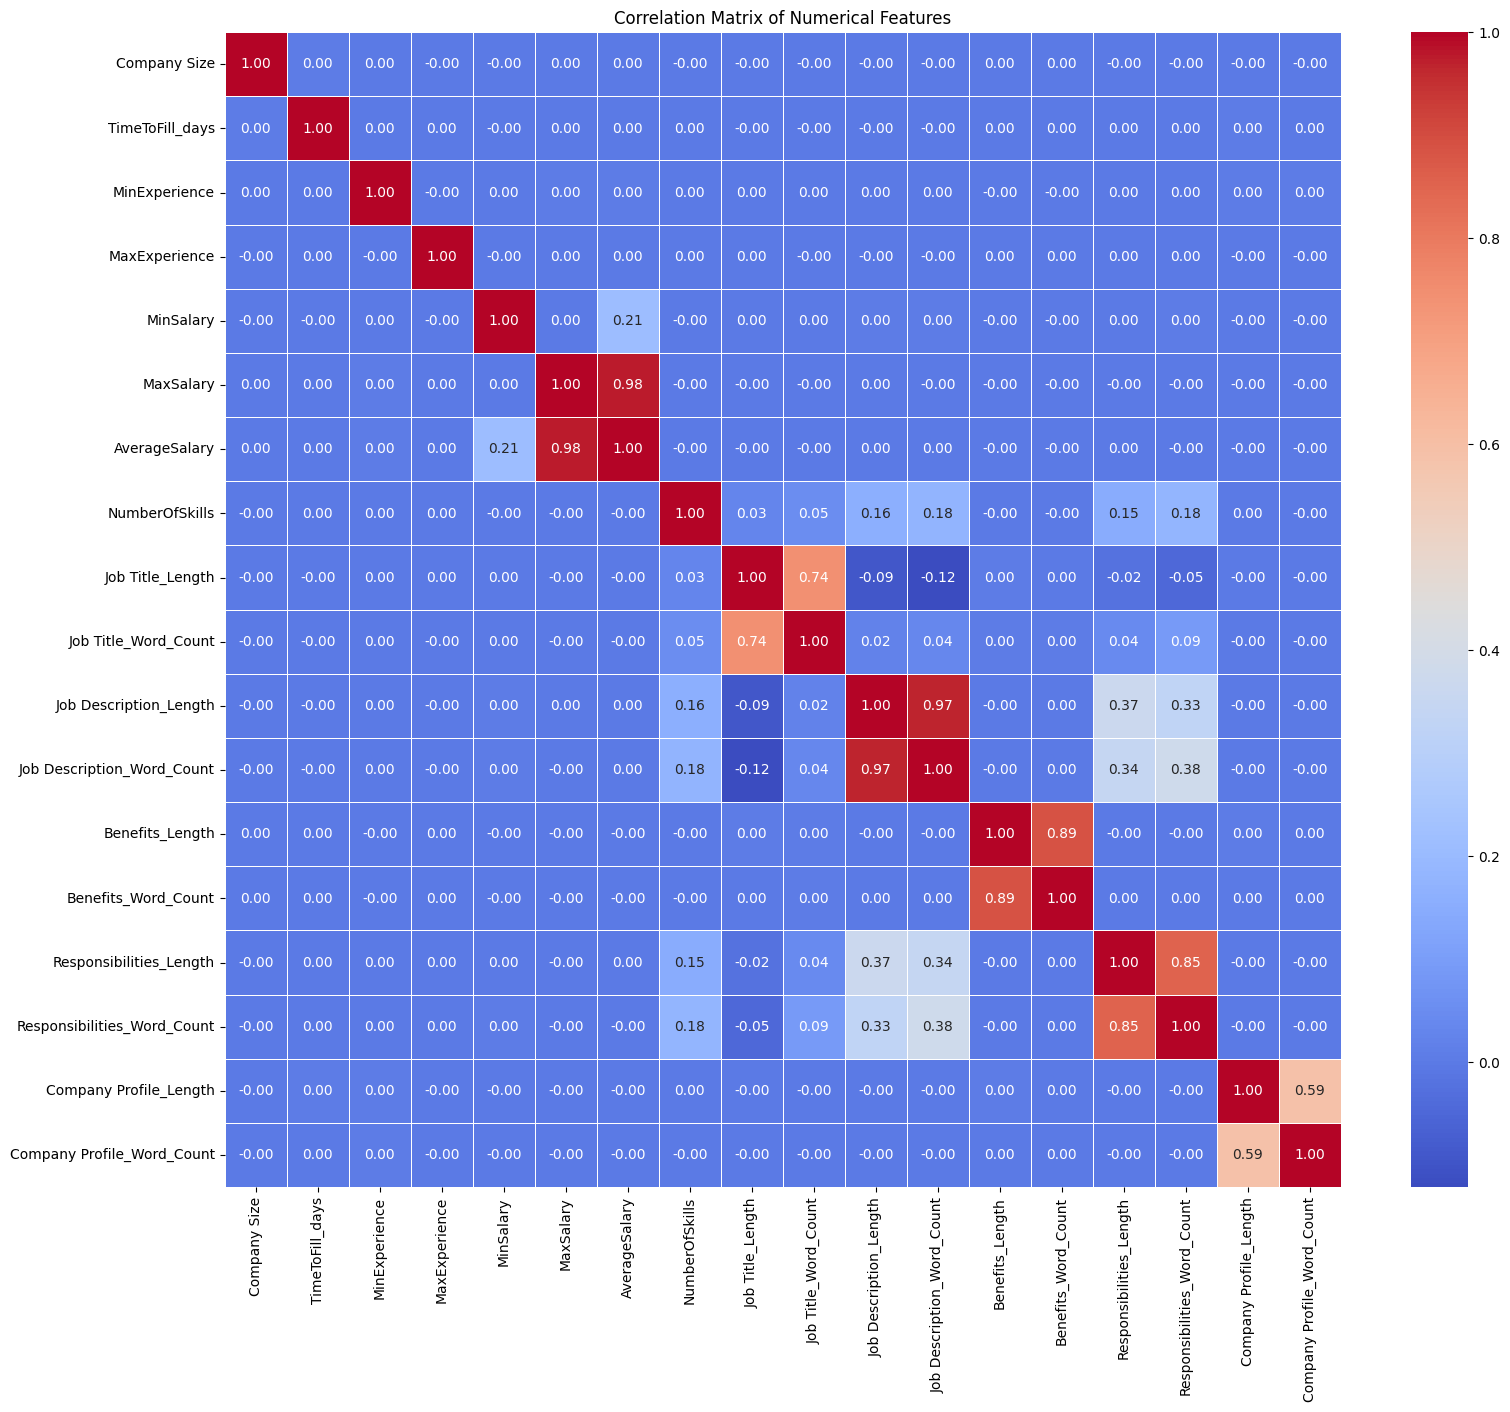


Correlation with TimeToFill_days (Synthetic):
TimeToFill_days                1.000000
Company Profile_Length         0.001803
Company Size                   0.001523
Benefits_Length                0.000916
Company Profile_Word_Count     0.000710
Benefits_Word_Count            0.000636
MinExperience                  0.000485
Responsibilities_Word_Count    0.000395
MaxExperience                  0.000351
MaxSalary                      0.000293
AverageSalary                  0.000206
Responsibilities_Length        0.000109
NumberOfSkills                 0.000101
Job Description_Length        -0.000090
Job Title_Word_Count          -0.000093
Job Description_Word_Count    -0.000193
MinSalary                     -0.000385
Job Title_Length              -0.000894
Name: TimeToFill_days, dtype: float64


In [15]:
if 'df' in locals() and df is not None:
    print("--- Correlation Analysis ---")
    
    # Select numerical columns for correlation matrix
    # This includes original numerical, parsed numerical, and newly created numerical features
    numerical_cols_for_corr = df.select_dtypes(include=np.number).columns.tolist()
    
    # Optional: Remove high-cardinality IDs or less relevant features if desired
    # For example, 'Job Id' is usually not included in correlation for modeling
    if 'Job Id' in numerical_cols_for_corr:
        numerical_cols_for_corr.remove('Job Id')
    if 'latitude' in numerical_cols_for_corr: # Often not directly linear with TTF
        numerical_cols_for_corr.remove('latitude')
    if 'longitude' in numerical_cols_for_corr: # Often not directly linear with TTF
        numerical_cols_for_corr.remove('longitude')

    if 'TimeToFill_days' not in numerical_cols_for_corr and 'TimeToFill_days' in df.columns:
         numerical_cols_for_corr.append('TimeToFill_days')


    print(f"Numerical columns selected for correlation: {numerical_cols_for_corr}")

    if numerical_cols_for_corr and len(numerical_cols_for_corr) > 1:
        correlation_matrix = df[numerical_cols_for_corr].corr()
        
        plt.figure(figsize=(18, 15)) # Adjust size as needed
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix of Numerical Features')
        plt.show()
        
        # Correlation with the target variable
        if 'TimeToFill_days' in correlation_matrix:
            print("\nCorrelation with TimeToFill_days (Synthetic):")
            print(correlation_matrix['TimeToFill_days'].sort_values(ascending=False))
        else:
            print("\n'TimeToFill_days' not found in the correlation matrix columns.")
            
    elif not numerical_cols_for_corr:
        print("No numerical columns found to compute correlation matrix.")
    else:
        print("Not enough numerical columns to compute a meaningful correlation matrix.")
else:
    print("DataFrame 'df' not found. Please run previous cells.")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Though we've handled most NaNs manually

if 'df' in locals() and df is not None:
    print("--- Feature Selection and Setup ---")

    # Define Target Variable
    TARGET_COL = 'TimeToFill_days'
    if TARGET_COL not in df.columns or df[TARGET_COL].isnull().all():
        print(f"FATAL ERROR: Target column '{TARGET_COL}' is missing or all NaN. Cannot proceed with modeling setup.")
        # raise ValueError(f"Target column '{TARGET_COL}' is missing or all NaN.") # Or handle more gracefully
        y = None
    else:
        y = df[TARGET_COL]

    # Define Numerical Features to use
    # (Excluding highly correlated ones like Min/MaxSalary if AverageSalary is used, and *_Length if *_Word_Count is used)
    numerical_features = [
        'Company Size', 
        'MinExperience', 
        'MaxExperience', 
        'AverageSalary', 
        'NumberOfSkills',
        'Job Title_Word_Count',
        'Job Description_Word_Count',
        'Benefits_Word_Count',
        'Responsibilities_Word_Count',
        'Company Profile_Word_Count'
    ]
    # Ensure all selected numerical features exist
    numerical_features = [col for col in numerical_features if col in df.columns]
    print(f"Selected numerical features: {numerical_features}")

    # Define Categorical Features for One-Hot Encoding
    # Start with a manageable set. 'location' and 'Company' are likely too high cardinality for direct OHE here.
    # 'Country' can also be high, but let's try it.
    categorical_features_for_ohe = [
        'Qualifications', 
        'Work Type', 
        'Role', 
        'Job Portal', 
        'Preference',
        'Country' 
    ]
    # Ensure all selected categorical features exist
    categorical_features_for_ohe = [col for col in categorical_features_for_ohe if col in df.columns]
    print(f"Selected categorical features for OHE: {categorical_features_for_ohe}")
    
    # Combine selected features for X
    # Make sure not to include the target or any synthetic date columns in X
    features_for_X = numerical_features + categorical_features_for_ohe
    
    # Drop rows where target is NaN (shouldn't be the case with our synthetic data after generation)
    # or where critical features might still be NaN (though we tried to fill most)
    df_model = df[features_for_X + [TARGET_COL]].copy()
    df_model.dropna(subset=[TARGET_COL], inplace=True) # Crucial for y

    # For features in X, imputation will be handled by the pipeline if any NaNs slip through
    # (e.g. if a new numerical feature was added and not imputed)
    
    X = df_model[features_for_X]
    y = df_model[TARGET_COL]
    
    print(f"\nShape of X (features): {X.shape}")
    print(f"Shape of y (target): {y.shape}")

    if X.empty or y.empty:
        print("ERROR: Feature matrix X or target vector y is empty. Check feature selection and data.")
    else:
        print("Feature selection and initial setup complete.")
else:
    print("DataFrame 'df' not found. Please run previous cells.")

--- Feature Selection and Setup ---
Selected numerical features: ['Company Size', 'MinExperience', 'MaxExperience', 'AverageSalary', 'NumberOfSkills', 'Job Title_Word_Count', 'Job Description_Word_Count', 'Benefits_Word_Count', 'Responsibilities_Word_Count', 'Company Profile_Word_Count']
Selected categorical features for OHE: ['Qualifications', 'Work Type', 'Role', 'Job Portal', 'Preference', 'Country']

Shape of X (features): (1615940, 16)
Shape of y (target): (1615940,)
Feature selection and initial setup complete.


In [17]:
if 'X' in locals() and 'y' in locals() and X is not None and y is not None and not X.empty and not y.empty:
    print("--- Building Preprocessing Pipeline and Splitting Data ---")

    # Create preprocessing pipelines for numerical and categorical features
    
    # Numerical pipeline: Impute NaNs (e.g., with median) then scale
    # Note: We manually imputed most NaNs, but this is good practice.
    numerical_pipeline = Pipeline([
        ('imputer_num', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Categorical pipeline: Impute NaNs (e.g., with 'Missing' category) then OneHotEncode
    # handle_unknown='ignore' will prevent errors if test set has categories not seen in train
    categorical_pipeline = Pipeline([
        ('imputer_cat', SimpleImputer(strategy='constant', fill_value='Missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False for easier inspection initially
    ])

    # Create a ColumnTransformer to apply pipelines to correct columns
    # Ensure the lists numerical_features and categorical_features_for_ohe are correctly defined from the previous cell
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features),
            ('cat', categorical_pipeline, categorical_features_for_ohe)
        ], 
        remainder='passthrough' # Keep any columns not specified, though we selected all for X
    )
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Shape of X_train before preprocessing: {X_train.shape}")
    print(f"Shape of X_test before preprocessing: {X_test.shape}")

    # Apply the preprocessing pipeline
    # FIT the preprocessor on the training data, then TRANSFORM both train and test
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # Get feature names after OHE for better interpretability if needed later
    # This can be a bit tricky with ColumnTransformer but is doable.
    try:
        ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features_for_ohe)
        all_feature_names = numerical_features + list(ohe_feature_names)
        print(f"\nNumber of features after OHE: {len(all_feature_names)}")
    except Exception as e:
        print(f"\nCould not retrieve OHE feature names: {e}")
        all_feature_names = None

    print(f"\nShape of X_train_processed: {X_train_processed.shape}")
    print(f"Shape of X_test_processed: {X_test_processed.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")
    
    print("\nPreprocessing and data splitting complete.")
    # X_train_processed and X_test_processed are now ready for model training
else:
    print("Feature matrix 'X' or target 'y' not defined or empty. Please run the 'Feature Selection' cell first.")


--- Building Preprocessing Pipeline and Splitting Data ---
Shape of X_train before preprocessing: (1292752, 16)
Shape of X_test before preprocessing: (323188, 16)

Number of features after OHE: 636

Shape of X_train_processed: (1292752, 636)
Shape of X_test_processed: (323188, 636)
Shape of y_train: (1292752,)
Shape of y_test: (323188,)

Preprocessing and data splitting complete.


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

if 'X_train_processed' in locals() and 'y_train' in locals() and \
   'X_test_processed' in locals() and 'y_test' in locals():
    
    print("--- Training RandomForestRegressor Model ---")
    
    # Initialize the model
    # n_estimators: number of trees in the forest
    # random_state: for reproducibility
    # n_jobs=-1: use all available cores for training (can speed it up)
    # max_depth: can be used to prevent overfitting, start without or with a moderate value
    # min_samples_split, min_samples_leaf: also for controlling tree complexity
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=10, min_samples_leaf=5)
    
    start_time = time.time()
    rf_model.fit(X_train_processed, y_train)
    end_time = time.time()
    
    print(f"Model training completed in {end_time - start_time:.2f} seconds.")
    
    print("\n--- Evaluating Model ---")
    # Predictions on the training set (to check for overfitting)
    y_train_pred = rf_model.predict(X_train_processed)
    
    # Predictions on the test set
    y_test_pred = rf_model.predict(X_test_processed)
    
    # Evaluate on Training Data
    print("\nTraining Set Performance:")
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"  Mean Squared Error (MSE): {train_mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {train_rmse:.2f}")
    print(f"  R-squared (R2): {train_r2:.2f}")
    
    # Evaluate on Test Data
    print("\nTest Set Performance:")
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"  Mean Squared Error (MSE): {test_mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {test_rmse:.2f}")
    print(f"  R-squared (R2): {test_r2:.2f}")

    print("\n--- Interpretation of Results (with SYNTHETIC Target) ---")
    print("Since 'TimeToFill_days' was generated randomly within a fixed range (e.g., 15-90 days),")
    print("we should NOT expect a high R-squared value. The model is essentially trying to predict a random number.")
    print("An R-squared close to 0 would be expected.")
    print("The RMSE should be interpreted in the context of the range of 'TimeToFill_days'.")
    print(f"Our synthetic TTF range was roughly 15 to 90 days. Average TTF was around {(15+90)/2:.2f} days.")

    # Optional: Feature Importances
    if hasattr(rf_model, 'feature_importances_') and 'all_feature_names' in locals() and all_feature_names is not None:
        try:
            importances = rf_model.feature_importances_
            feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
            feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
            
            print("\nTop 20 Feature Importances:")
            print(feature_importance_df.head(20))
            
            # Plot feature importances
            plt.figure(figsize=(10, 8))
            sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
            plt.title('Top 20 Feature Importances from RandomForestRegressor')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not display feature importances: {e}")
            print("Ensure 'all_feature_names' was correctly populated in the preprocessing step.")

else:
    print("Processed training/testing data not found. Please run the preprocessing cells first.")


--- Training RandomForestRegressor Model ---


KeyboardInterrupt: 

In [19]:
        if 'X' in locals() and 'y' in locals() and X is not None and y is not None and not X.empty and not y.empty:
            print("--- Saving X and y to CSV files before split and full preprocessing ---")
            
            import os
            processed_data_path = '../data/processed'
            if not os.path.exists(processed_data_path):
                os.makedirs(processed_data_path) # <-- This line creates the directory
                print(f"Created directory: {processed_data_path}")
        
            x_file_path = os.path.join(processed_data_path, 'X_features.csv')
            y_file_path = os.path.join(processed_data_path, 'y_target.csv')
            
            try:
                X.to_csv(x_file_path, index=False)
                y.to_csv(y_file_path, index=False, header=True)
                print(f"X saved to {x_file_path}")
                print(f"y saved to {y_file_path}")
                print("Data saving complete. You can now use these files in a standalone Python script.")
            except Exception as e:
                print(f"Error saving data to CSV: {e}")
        else:
            print("Feature matrix 'X' or target 'y' not defined or empty. Cannot save.")

--- Saving X and y to CSV files before split and full preprocessing ---
Created directory: ../data/processed
X saved to ../data/processed\X_features.csv
y saved to ../data/processed\y_target.csv
Data saving complete. You can now use these files in a standalone Python script.
